In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [5]:
# silence warnings
import warnings
warnings.filterwarnings('ignore')

# Clean & Filter Dataset

In [6]:
df = pd.read_csv('../Datasets/games-features.csv')
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], errors='coerce')
df = df.loc[df['ReleaseDate'].notnull()]
df = df.loc[df['GenreIsNonGame'] == False]
# CONSIDER DROPPING GAMES THAT HAVEN'T BEEN OWNED
df = df.loc[df['SteamSpyOwners'] > 0]
df = df.drop(columns=['QueryID', 'ResponseID', 'QueryName', 'PackageCount',
                      'AchievementHighlightedCount', 'AchievementCount', 'ControllerSupport', 'PCReqsHaveMin',
                      'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin',
                      'MacReqsHaveRec', 'SupportEmail', 'SupportURL', 'ExtUserAcctNotice',
                      'HeaderImage', 'LegalNotice', 'Website', 'PCMinReqsText',
                      'PCRecReqsText', 'LinuxMinReqsText', 'LinuxRecReqsText', 'MacMinReqsText',
                      'MacRecReqsText'])
# log of SteamSpyOwners
df['log_owners'] = np.log(df['SteamSpyOwners'])
df.head()

ResponseName ReleaseDate  RequiredAge  DemoCount  \
0             Counter-Strike  2000-11-01            0          0   
1      Team Fortress Classic  1999-04-01            0          0   
2              Day of Defeat  2003-05-01            0          0   
3         Deathmatch Classic  2001-06-01            0          0   
4  Half-Life: Opposing Force  1999-11-01            0          0   

   DeveloperCount  DLCCount  Metacritic  MovieCount  RecommendationCount  \
0               1         0          88           0                68991   
1               1         0           0           0                 2439   
2               1         0          79           0                 2319   
3               1         0           0           0                  888   
4               1         0           0           0                 2934   

   PublisherCount  ...  PriceInitial  PriceFinal  \
0               1  ...          9.99        9.99   
1               1  ...          4.99        4.99   
2               1  ...          4.99        4.99   
3               1  ...          4.99        4.99   
4               1  ...          4.99        4.99   

                                           AboutText  \
0  Play the worlds number 1 online action game. E...   
1  One of the most popular online action games of...   
2  Enlist in an intense brand of Axis vs. Allied ...   
3  Enjoy fast-paced multiplayer gaming with Death...   
4  Return to the Black Mesa Research Facility as ...   

                                          Background  ShortDescrip  \
0  http://cdn.akamai.steamstatic.com/steam/apps/1...                 
1  http://cdn.akamai.steamstatic.com/steam/apps/2...                 
2  http://cdn.akamai.steamstatic.com/steam/apps/3...                 
3  http://cdn.akamai.steamstatic.com/steam/apps/4...                 
4  http://cdn.akamai.steamstatic.com/steam/apps/5...                 

                                     DetailedDescrip  DRMNotice  Reviews  \
0  Play the worlds number 1 online action game. E...                       
1  One of the most popular online action games of...                       
2  Enlist in an intense brand of Axis vs. Allied ...                       
3  Enjoy fast-paced multiplayer gaming with Death...                       
4  Return to the Black Mesa Research Facility as ...                       

                                  SupportedLanguages  log_owners  
0  English French German Italian Spanish Simplifi...   16.383021  
1              English French German Italian Spanish   15.501750  
2              English French German Italian Spanish   15.846432  
3              English French German Italian Spanish   15.830276  
4                       English French German Korean   15.501817  

[5 rows x 54 columns]

In [7]:
df['ReleaseYear'] = df['ReleaseDate'].dt.year

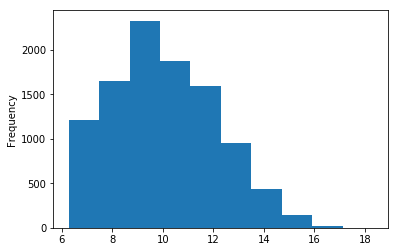

In [8]:
df['log_owners'].plot(kind = 'hist')

In [10]:
threshold = 10
df['Popular'] = df['log_owners'].apply(lambda x: True if x >= threshold else False)

In [11]:
lst = ['GenreIsNonGame',
        'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
        'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation', 'GenreIsEarlyAccess',
        'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer', 'Popular']
subset = df[lst]

# Don't use individual category column!!!! all train and test scores are same using same x_train, y_train, show here as example

In [130]:
x_train, x_test, y_train, y_test = train_test_split(subset.drop(columns = ['Popular']), 
                                                    np.array(subset['Popular']).reshape(-1,1), test_size = 0.3)

In [131]:
train_scores = {}
test_scores = {}
for col in subset.drop(columns = ['Popular']).columns.tolist():
    lr = SVC(kernel = 'linear', C = 0.025, random_state = 101)
    lr.fit(x_train, y_train)
    preds = lr.predict(x_test)
    train_score = lr.score(x_train, y_train)
    test_score = lr.score(x_test, y_test)
    train_scores[col] = train_score
    test_scores[col] = test_score

# As you can see, they are all the same, do not use

In [132]:
train_scores_df = pd.DataFrame(train_scores ,index = ['train_scores']).T
test_scores_df = pd.DataFrame(test_scores, index = ['test_scores']).T
pd.concat([train_scores_df, test_scores_df], axis = 1)

train_scores  test_scores
GenreIsNonGame                   0.607717     0.599152
GenreIsIndie                     0.607717     0.599152
GenreIsAction                    0.607717     0.599152
GenreIsAdventure                 0.607717     0.599152
GenreIsCasual                    0.607717     0.599152
GenreIsStrategy                  0.607717     0.599152
GenreIsRPG                       0.607717     0.599152
GenreIsSimulation                0.607717     0.599152
GenreIsEarlyAccess               0.607717     0.599152
GenreIsFreeToPlay                0.607717     0.599152
GenreIsSports                    0.607717     0.599152
GenreIsRacing                    0.607717     0.599152
GenreIsMassivelyMultiplayer      0.607717     0.599152

# Model Scores After Partition Data To Train And Test Set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(subset.drop(columns = ['Popular']), 
                                                    np.array(subset['Popular']).reshape(-1,1), test_size = 0.3)

In [110]:
svm = SVC(kernel = 'linear', C = 0.025, random_state = 101)
lr = LogisticRegression()
dtree = DecisionTreeClassifier(max_depth = 10, random_state = 101, max_features = None, min_samples_leaf = 15)

In [111]:
agg_models = [lr, dtree, svm]
model_names = ['lr', 'dtree', 'svm']

In [112]:
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors = i)
    model_names.append('knn' + str(i))
    agg_models.append(knn)

In [113]:
score_lst = []
for i in range(len(agg_models)):
    model = agg_models[i]
    model.fit(x_train, y_train)
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    score_lst.append([model.score(x_train, y_train), model.score(x_test, y_test)])

In [114]:
joined_scores = pd.DataFrame(dict(zip(model_names, score_lst))).T
joined_scores.columns = ['train_score', 'test_score']
joined_scores.head()

train_score  test_score
lr        0.646162    0.647423
dtree     0.657626    0.652642
svm       0.604641    0.602740
knn1      0.584790    0.548598
knn2      0.622396    0.609263

# Decision Tree gives best prediction of train data and test data

In [115]:
display(joined_scores.loc[joined_scores['train_score'].idxmax()])
display(joined_scores.loc[joined_scores['test_score'].idxmax()])

train_score    0.657626
test_score     0.652642
Name: dtree, dtype: float64

train_score    0.657626
test_score     0.652642
Name: dtree, dtype: float64

# Cross Validation Scores Using Entire Dataset

In [121]:
svm = SVC(kernel = 'linear', C = 0.025, random_state = 101)
lr = LogisticRegression()
dtree = DecisionTreeClassifier(max_depth = 10, random_state = 101, max_features = None, min_samples_leaf = 15)

In [122]:
agg_models = [lr, dtree, svm]
model_names = ['lr', 'dtree', 'svm']

In [123]:
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors = i)
    model_names.append('knn' + str(i))
    agg_models.append(knn)

In [124]:
scores = {}
for i in range(len(agg_models)):
    score = cross_val_score(agg_models[i], subset.drop(columns = ['Popular']), subset['Popular'], cv =5)
    scores[model_names[i]] = score

In [134]:
scores_df = pd.DataFrame(scores).T
scores_df['mean'] = scores_df.apply(lambda x: x.mean(), axis = 1)
scores_df.columns = ['1st_set', '2nd_set', '3rd_set', '4th_set', '5th_set', 'mean']
scores_df.head()

1st_set   2nd_set   3rd_set   4th_set   5th_set      mean
lr     0.694866  0.644499  0.605482  0.647088  0.649535  0.648294
dtree  0.698778  0.635208  0.589329  0.653451  0.652961  0.645945
svm    0.625917  0.608313  0.584435  0.604014  0.608419  0.606219
knn1   0.595110  0.512469  0.520313  0.517376  0.537934  0.536641
knn2   0.648900  0.532518  0.557024  0.554577  0.556045  0.569813

# Logistic Regression Performs Best in Cross Validation

In [135]:
display(scores_df.loc[scores_df['mean'].idxmax()])

1st_set    0.694866
2nd_set    0.644499
3rd_set    0.605482
4th_set    0.647088
5th_set    0.649535
mean       0.648294
Name: lr, dtype: float64